In [41]:
library(ggplot2)
 
library(readr)
library(gmodels)
library(ggpubr)
library(vioplot)

In [42]:
library("scatterplot3d")

In [2]:
train <- read.csv('train.csv', sep =',' )

In [121]:
cat_cols <- colnames(train)[ (colnames(train) != 'area') & (colnames(train) != 'security_deposit')
                           & (colnames(train) !=  'price')]

In [122]:
for ( I in cat_cols){
    train[,I] <- as.factor( train[,I] )
    
}

In [123]:
head( train ,5)

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser.solar,security_deposit,CCTV.security,lift,neighbourhood
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>
1,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
2,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600
3,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3100
4,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,300
5,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0


In [21]:
room <- train$room
bathroom <- train$bathroom
floor <- train$floor
dist <- train$neighbourhood
depos <-  train$security_deposit
area <- train$area
id <- train$Property_ID 
price <- log( train$price )

In [11]:
cor( cbind( room , bathroom , floor , dist, depos ,area, id ,price)  , method = 'spearman')

,room,bathroom,floor,dist,depos,area,id,price
room,1.00000000,0.22965922,0.041091414,-0.063897683,0.18136864,0.19735858,-0.143260138,0.20920255
bathroom,0.22965922,1.00000000,0.045639986,-0.044763180,0.14769899,0.16323756,-0.100774430,0.17108628
floor,0.04109141,0.04563999,1.000000000,-0.008043929,0.02579079,0.02245494,-0.001817411,0.02668100
dist,-0.06389768,-0.04476318,-0.008043929,1.000000000,-0.04061288,-0.03199149,0.041715287,-0.04868291
depos,0.18136864,0.14769899,0.025790789,-0.040612875,1.00000000,0.13805104,-0.116524048,0.85423278
area,0.19735858,0.16323756,0.022454936,-0.031991493,0.13805104,1.00000000,-0.124678904,0.16236137
id,-0.14326014,-0.10077443,-0.001817411,0.041715287,-0.11652405,-0.12467890,1.000000000,-0.13530227
price,0.20920255,0.17108628,0.026681003,-0.048682906,0.85423278,0.16236137,-0.135302265,1.00000000


ln price ~  room

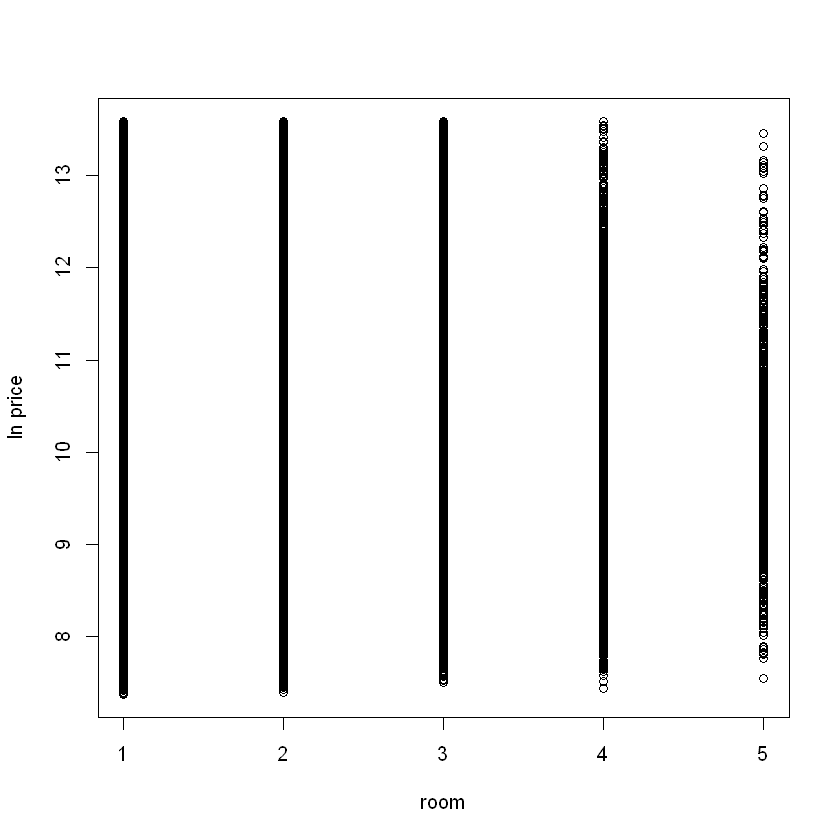

ln price ~  bathroom

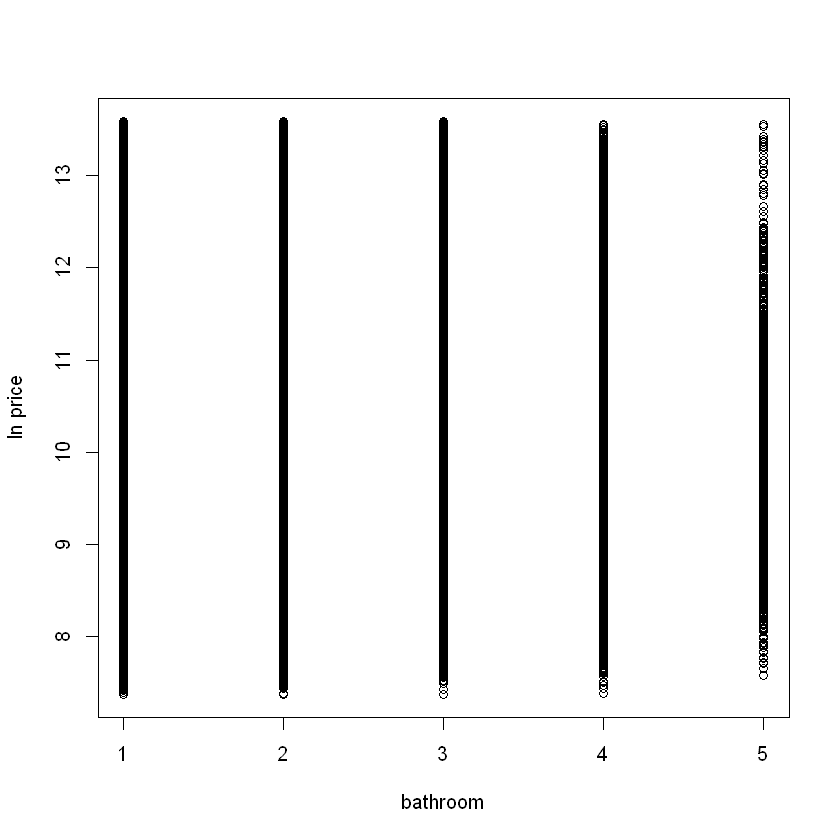

ln price ~  floor

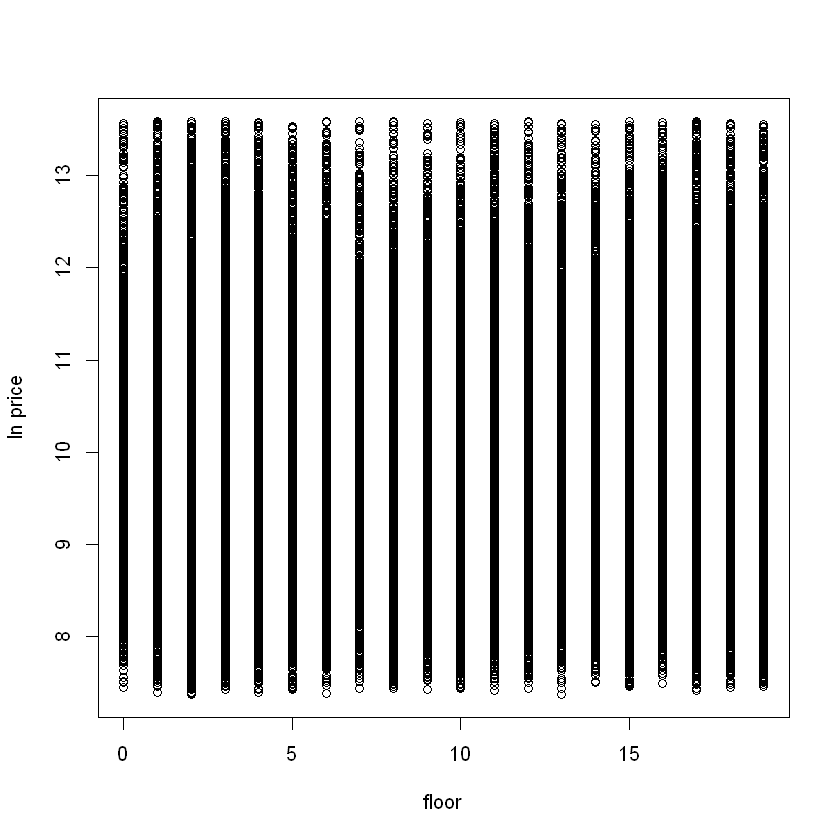

ln price ~  dist

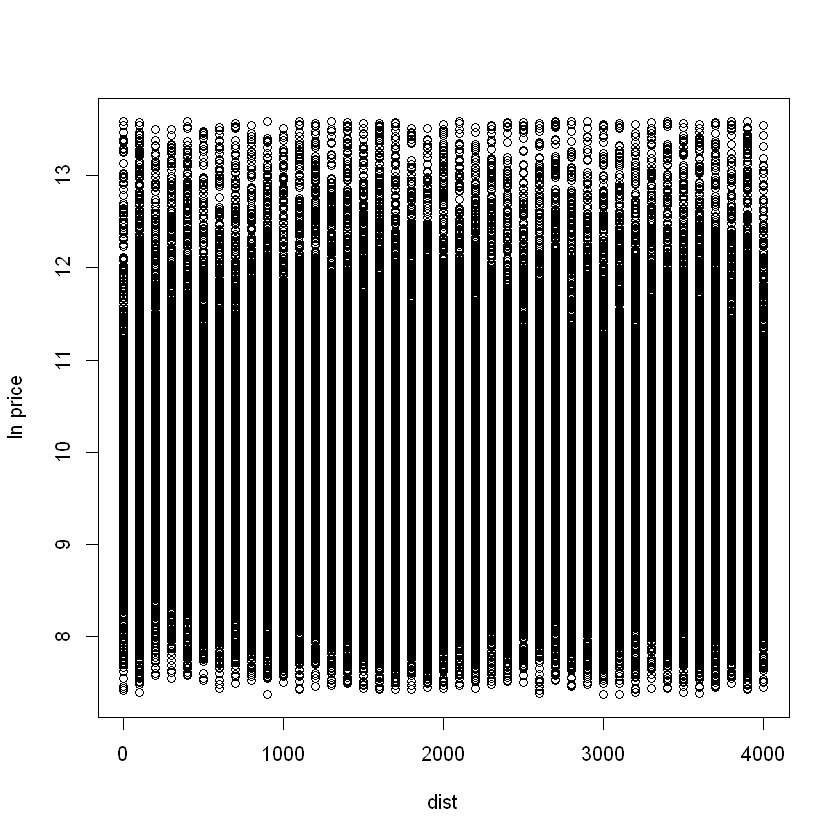

ln price ~  depos

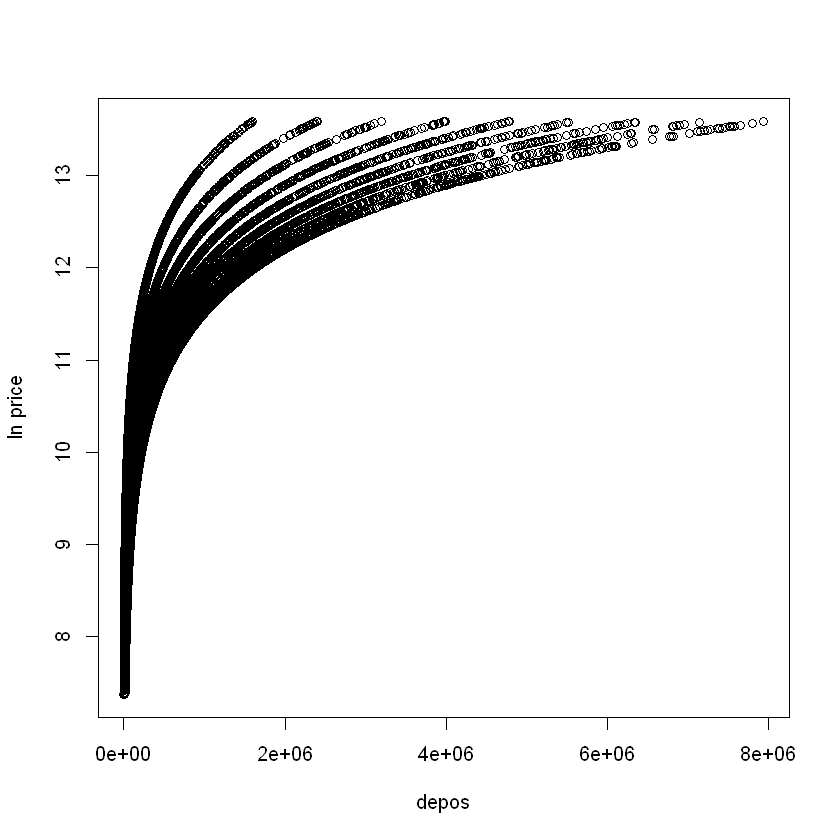

ln price ~  area

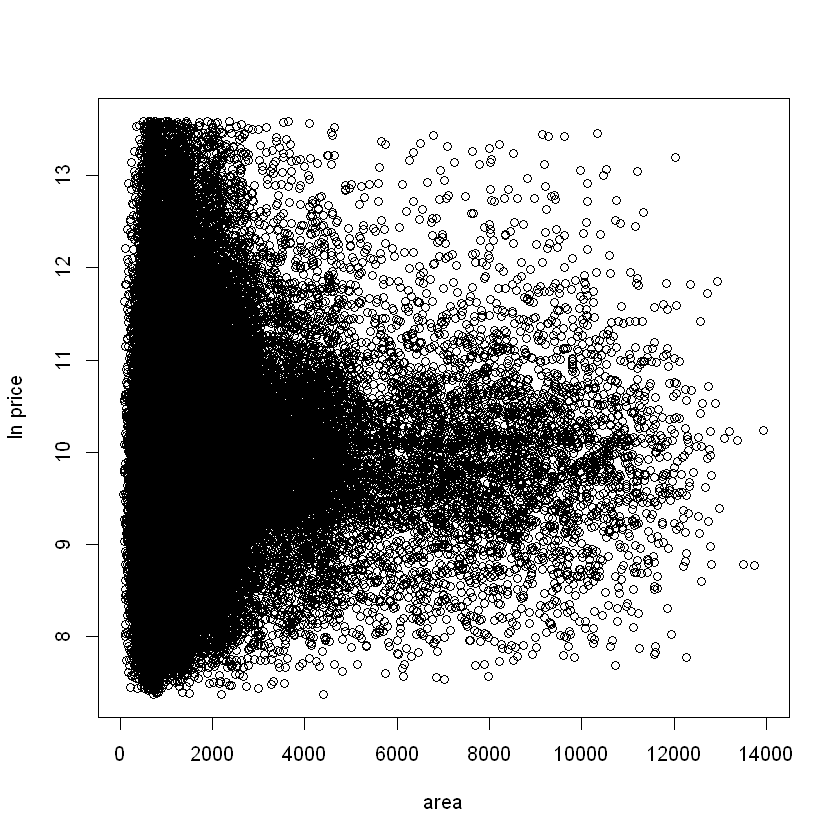

ln price ~  id

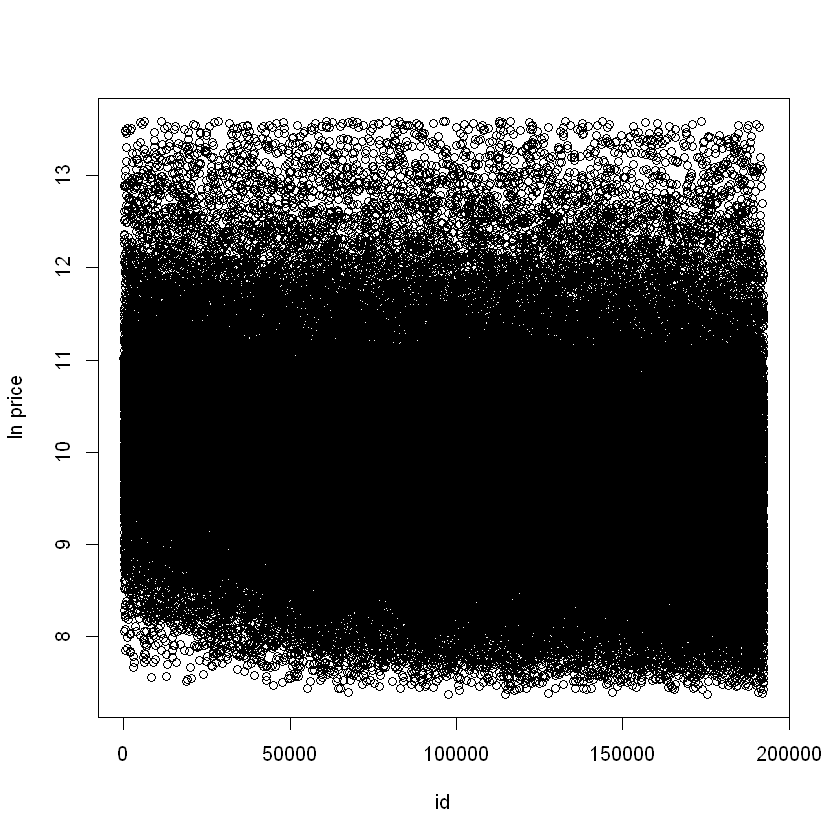

In [22]:
s <- list( room , bathroom , floor , dist, depos ,area, id)
mns <- c( 'room' , 'bathroom' , 'floor' , 'dist', 'depos' ,'area', 'id')
for ( i in 1: length( s ) ){
    plot( s[[i]] , price , xlab = mns[i] , ylab = 'ln price' , main = cat('ln price ~ ',mns[i] ) )
    
}

Из графиков видно, что стоит подробнее рассмотреть признаки  depos (security deposit) и  area. Остальные признаки имеют ограниченный набор значений, их можно интерпретировать как категориальные. Либо не имеют никакой связи, как ID.

ln price ~  depos

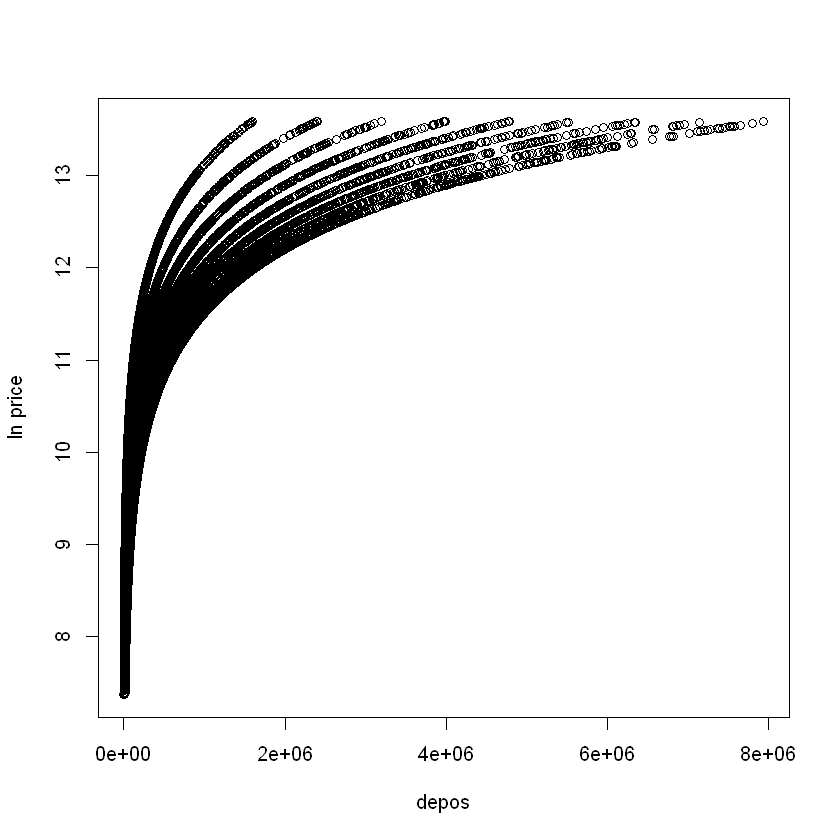

In [23]:
i <- 5
plot( s[[i]] , price , xlab = mns[i] , ylab = 'ln price' , main = cat('ln price ~ ',mns[i] ) )

На графике прослеживается график логарифма. 

Нужно логарифмировать переменную depos для спрямления координат. 

ln price ~ ln  depos

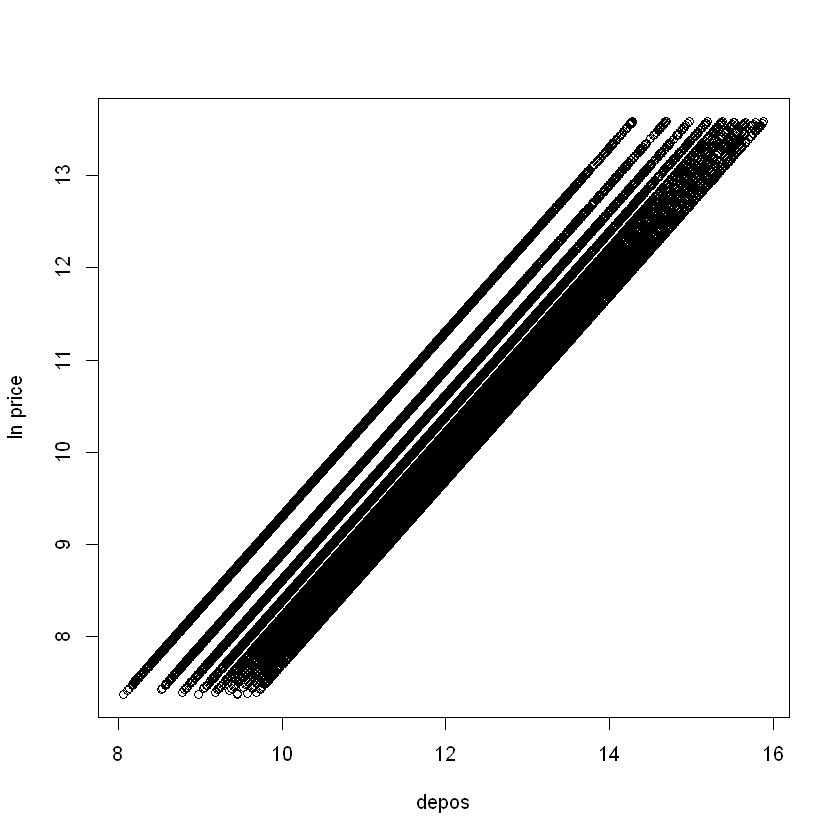

In [98]:
i <- 5
plot( log( depos ) , price , xlab = mns[i] , ylab = 'ln price' , main = cat('ln price ~ ln ',mns[i] ) )

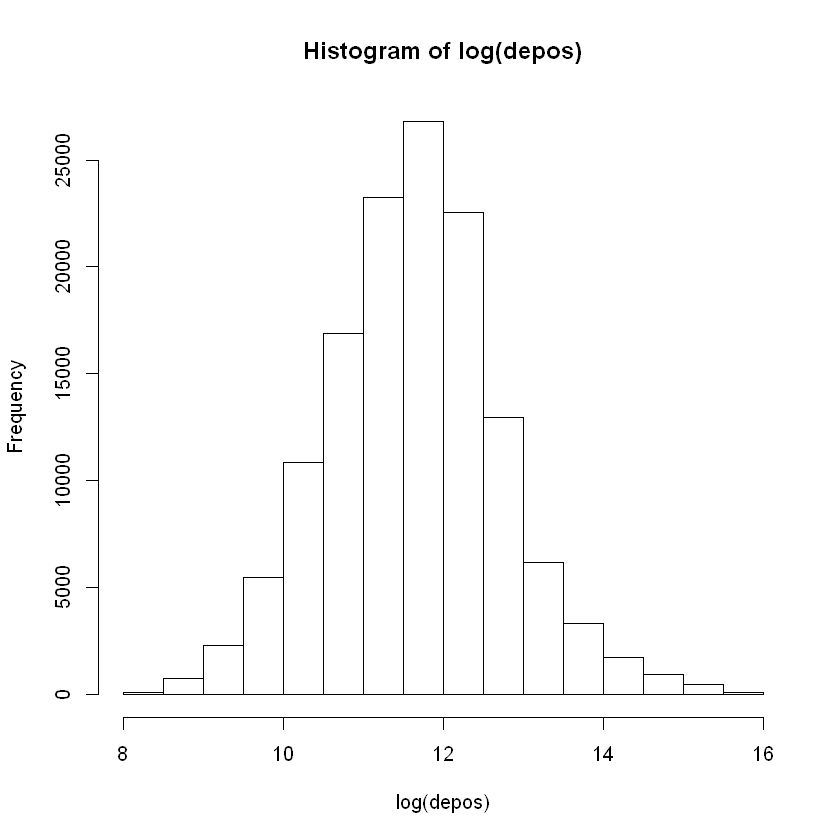

In [99]:
 
hist( log( depos )   )

In [116]:
cor( log( depos) ,  price  ,  method = 'spearman' )

[1] 0.8542328

На графике видно несколько четко прямых линий. Стоит рассмотреть вопрос о связи их расположения со значениями категорий.

График зависимости логарифма цены от площади.

ln price ~ ln  area

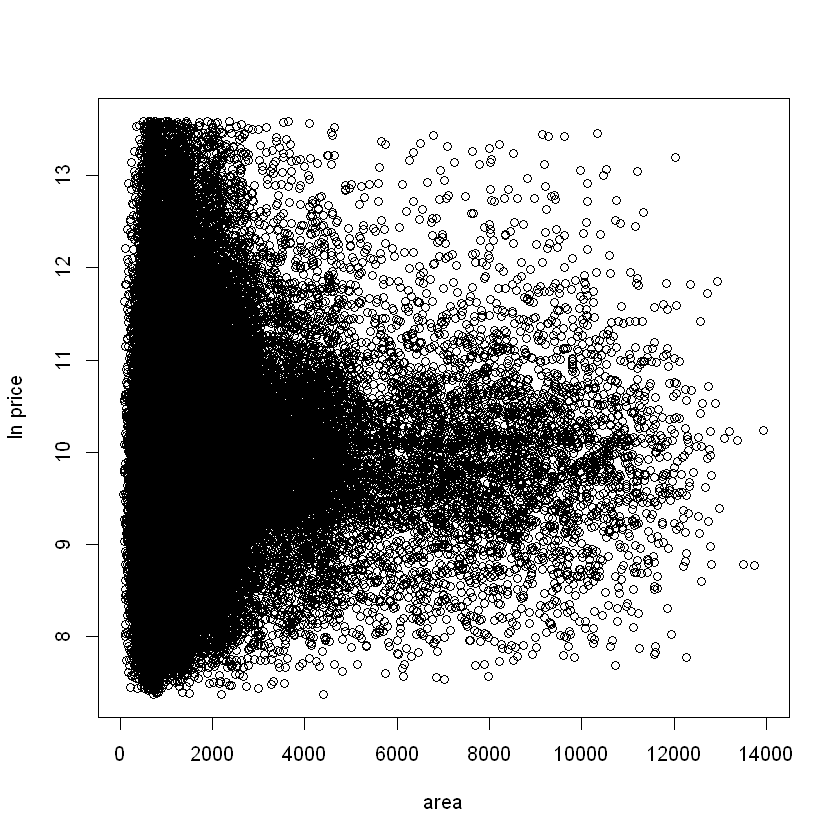

In [28]:
i <- 6
plot(  ( s[[i]] ) , price , xlab = mns[i] , ylab = 'ln price' , main = cat('ln price ~ ln ',mns[i] ) )

Гистограмма распределения площади

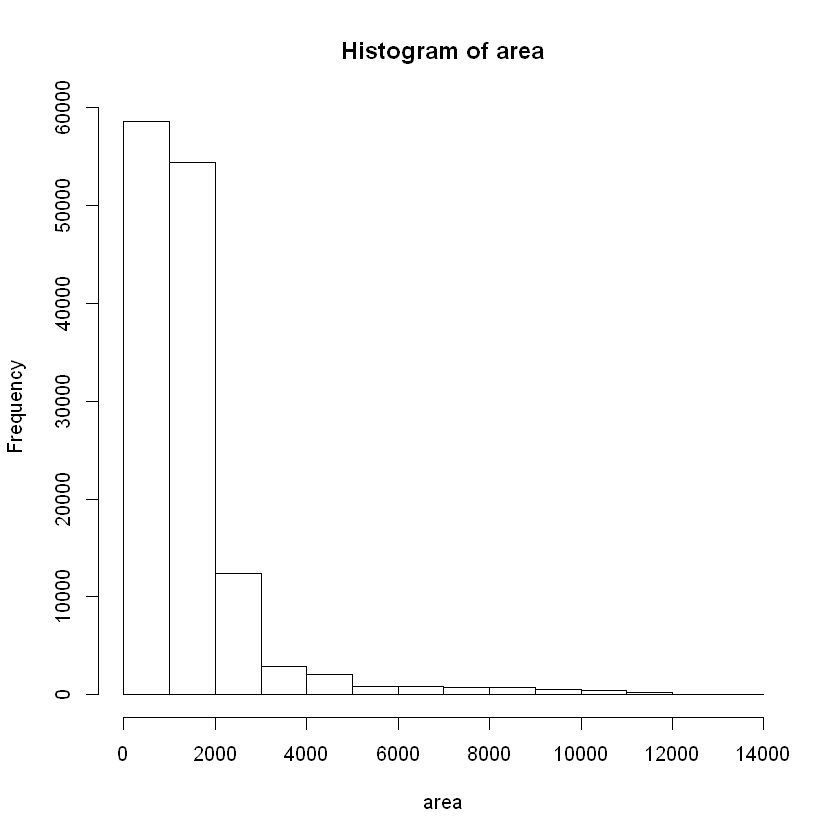

In [101]:
hist(   area     )

Корреляция с логарифмом цены очень низкая - на графике свяль между переменными отсутствует.

In [115]:
cor( area  ,  price  ,  method = 'spearman' )

[1] 0.1623614

Зависимость логарифма цены от логарифма депозита и площади

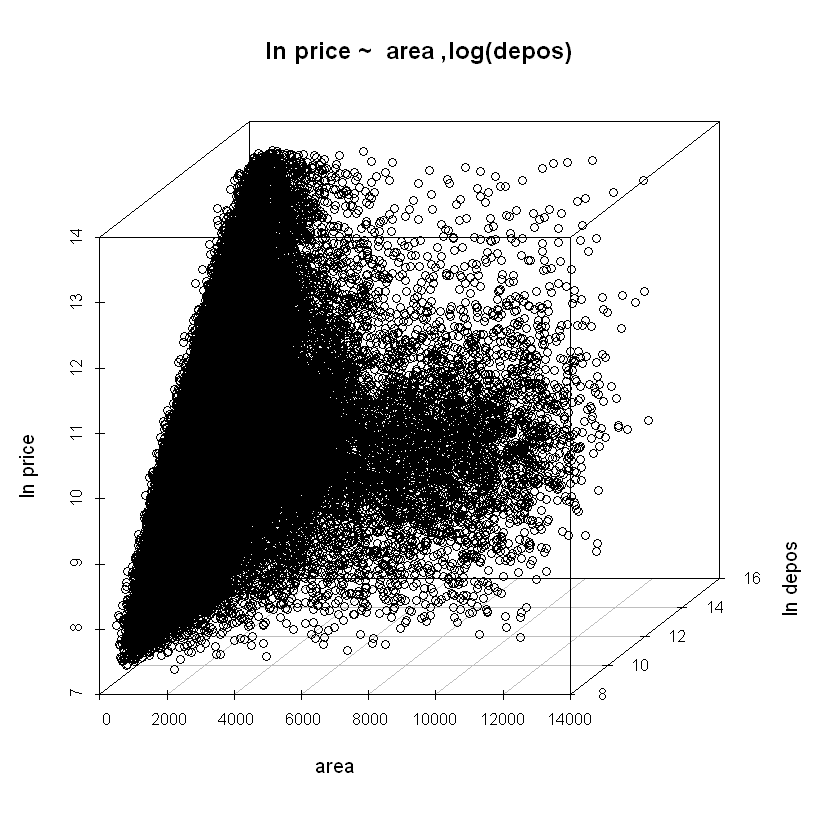

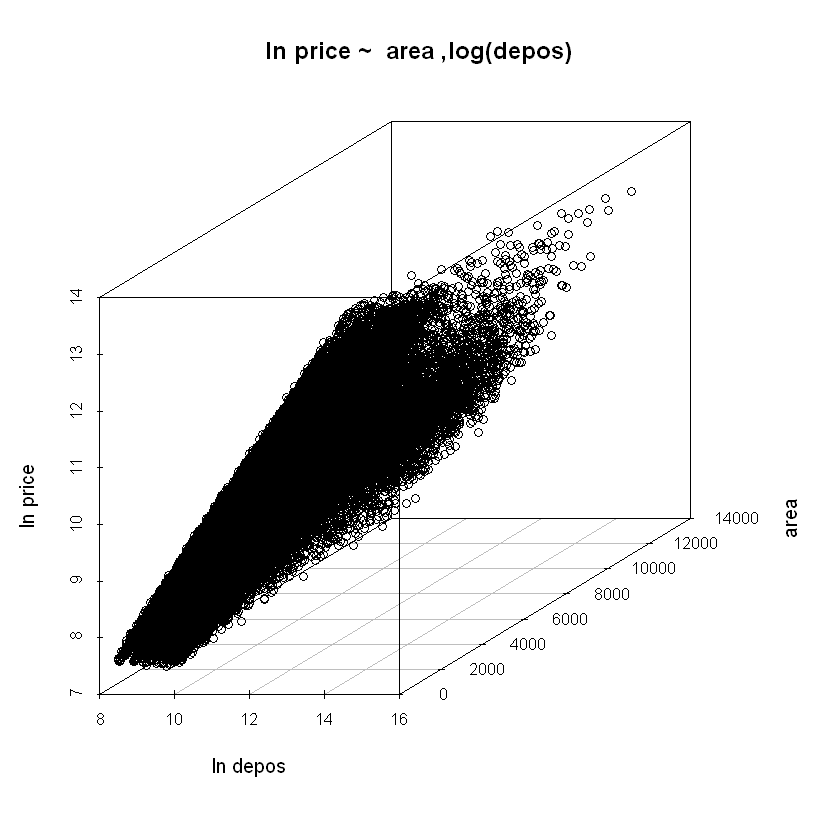

In [114]:
scatterplot3d( cbind(   area ,log(depos),  price ),
              main="ln price ~  area ,log(depos)",
              xlab = "area",
              ylab = "ln depos",
              zlab = "ln price"   )
scatterplot3d( cbind( log(depos),  area ,   price ),
              main="ln price ~  area ,log(depos)",
              xlab = "ln depos",
              ylab = "area",
              zlab = "ln price"   )

Из графиков видно, что связь может быть описана линейной моделью.

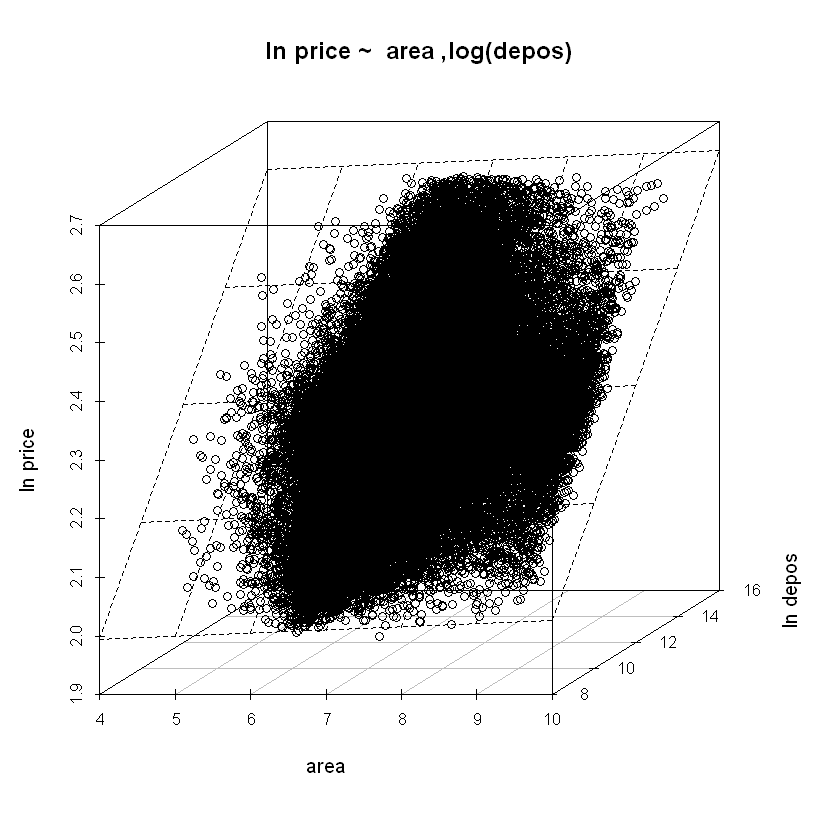

In [60]:
plane <- lm(   price  ~  log( area )  + log(depos))
sc1 <- scatterplot3d( cbind(  log( area ) ,log(depos), price ),
              main="ln price ~  area ,log(depos)",
              xlab = "area",
              ylab = "ln depos",
              zlab = "ln price"   )
 
sc1 <- sc1$plane3d( plane )
 

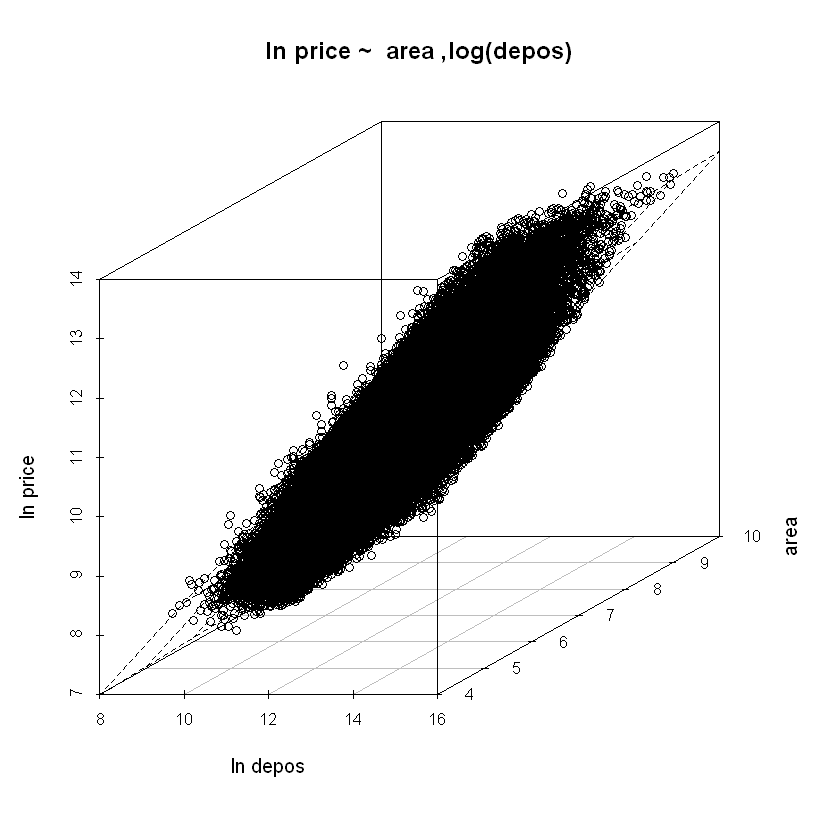

In [113]:
plane <- lm(   price   ~  log(depos) + log( area )    )
sc2 <-scatterplot3d( cbind( log(depos),  log( area )  ,  price ),
              main="ln price ~  area ,log(depos)",
              xlab = "ln depos",
              ylab = "area",
              zlab = "ln price"   )
sc2 <-sc2$plane3d( plane )

Результаты анализа линейной модели

In [117]:
plane <- lm(  ( price ) ~  log(depos) +  area      )
summary( plane)


Call:
lm(formula = (price) ~ log(depos) + area)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04102 -0.34651 -0.06502  0.30947  1.55960 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.171e-01  1.311e-02   62.33   <2e-16 ***
log(depos)  7.845e-01  1.122e-03  699.39   <2e-16 ***
area        9.031e-06  8.643e-07   10.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4474 on 134680 degrees of freedom
Multiple R-squared:  0.7849,	Adjusted R-squared:  0.7849 
F-statistic: 2.457e+05 on 2 and 134680 DF,  p-value: < 2.2e-16


Исправленный коэффициент детерминации - 0.78 - линейная модель от 2 признаков объяесняет 78% дисперсии в данных

Выводы: 

Имеются 2 числовых признака - логарифм депозита и площадь квартиры. Взаимодействуя линейно, они линейно влияют на цену. 